In [105]:
## how to save a model in ML using Picklel
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import style

In [106]:
## load the data
data_path = './data/student-por.csv'

df = pd.read_csv(data_path, sep= ';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Simple numerical attributes:
#### `sex` == student's sex (binary: 'F' - female or 'M' - male)
#### `age` == student's age (numeric: from 15 to 22)
#### `G1, G2, G3` == grades(marks) related to course, Math or Portuguese
#### `studytime` == weekly study time: 1-<2 hr, 2-5 hr, 3,5-10 hr, or 4->10 hr
#### `failures` == number of past class failures (numeric: n if 1<=n<3, else 4)
#### `absences` == number of school absences (numeric: from 0 to 93)

In [107]:
## numericall attributes are easy to work with
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'age', 'sex']]

In [108]:
df.head()

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,F
1,9,11,11,2,0,2,17,F
2,12,13,12,2,0,6,15,F
3,14,14,14,3,0,0,15,F
4,11,13,13,2,0,0,16,F


In [109]:
df.dtypes

G1            int64
G2            int64
G3            int64
studytime     int64
failures      int64
absences      int64
age           int64
sex          object
dtype: object

In [110]:
## preprocess or data cleaning
df.isna()

,G1,G2,G3,studytime,failures,absences,age,sex
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False


In [111]:
df = df.copy()

In [112]:
#df['sex'].sum() ## sum cannot be done on non numericals

In [113]:
## convert binary F and M to 0 or 1
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [114]:
df['sex'].sum()

266

In [115]:
df.head()

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,0
1,9,11,11,2,0,2,17,0
2,12,13,12,2,0,6,15,0
3,14,14,14,3,0,0,15,0
4,11,13,13,2,0,0,16,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         649 non-null    int64
 1   G2         649 non-null    int64
 2   G3         649 non-null    int64
 3   studytime  649 non-null    int64
 4   failures   649 non-null    int64
 5   absences   649 non-null    int64
 6   age        649 non-null    int64
 7   sex        649 non-null    int64
dtypes: int64(8)
memory usage: 40.7 KB


In [117]:
print(df)

     G1  G2  G3  studytime  failures  absences  age  sex
0     0  11  11          2         0         4   18    0
1     9  11  11          2         0         2   17    0
2    12  13  12          2         0         6   15    0
3    14  14  14          3         0         0   15    0
4    11  13  13          2         0         0   16    0
..   ..  ..  ..        ...       ...       ...  ...  ...
644  10  11  10          3         1         4   19    0
645  15  15  16          2         0         4   18    0
646  11  12   9          2         0         6   18    0
647  10  10  10          1         0         6   17    1
648  10  11  11          1         0         4   18    1

[649 rows x 8 columns]


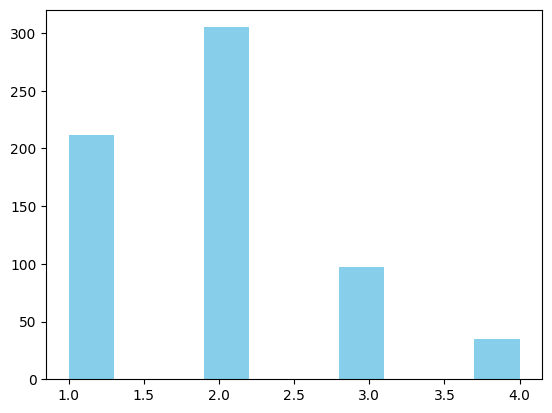

In [118]:
## plot the data to get clear understanding
plt.hist(df['studytime'], color= 'skyblue')


plt.show()

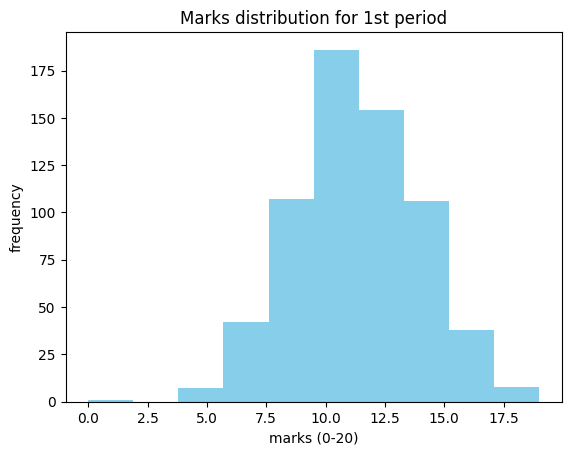

In [119]:
plt.hist(df['G1'], color= 'skyblue')  # G1 - first period grade: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

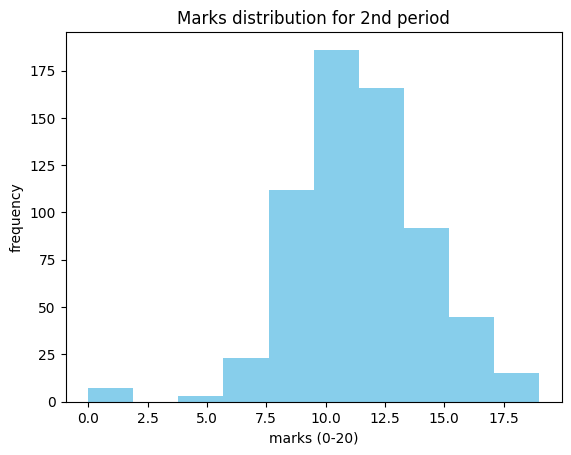

In [120]:
plt.hist(df['G2'], color= 'skyblue')    # G2 - 2nd period grades: outof 20
plt.title('Marks distribution for 2nd period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

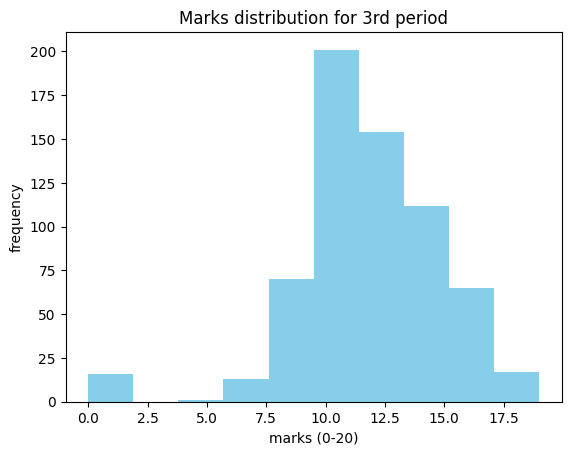

In [121]:
plt.hist(df['G3'], color= 'skyblue')  # G3 - last period grade: outof 20
plt.title('Marks distribution for 3rd period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

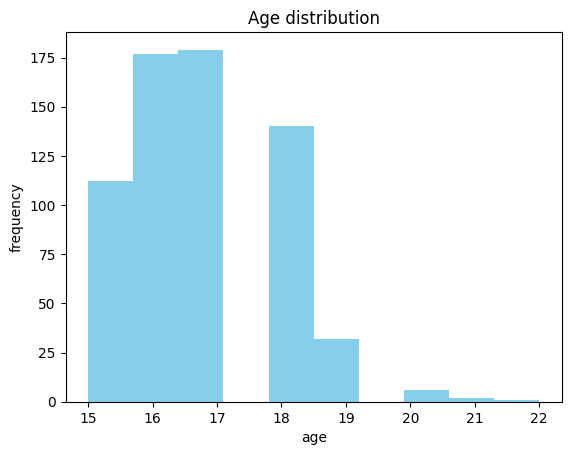

In [122]:
plt.hist(df['age'], color= 'skyblue') 
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('frequency')

plt.show()

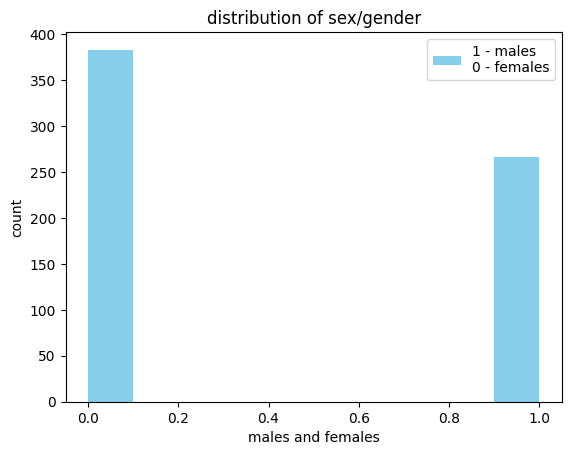

In [123]:
plt.hist(df['sex'], color= 'skyblue', label= '1 - males \n0 - females')
plt.title('distribution of sex/gender')
plt.xlabel('males and females')
plt.ylabel('count')

plt.legend()
plt.show()

In [124]:
#plt.scatter(df['age'], df['G1'], color= 'skyblue')
#plt.title('age vs grades')
#plt.xlabel('Age')
#plt.ylabel('Grades')

#plt.show()

#### Split data and Evaluate the model

In [125]:
## predict the attribute G3 (final)
pred = 'G3'             # what we want to achieve/ often called 'label'
X = np.array(df.drop([pred], axis= 1))
y = np.array(df[pred])

In [126]:
y

array([11, 11, 12, 14, 13, 13, 13, 13, 17, 13, 14, 13, 12, 13, 15, 17, 14,
       14,  7, 12, 14, 12, 14, 10, 10, 12, 12, 11, 13, 12, 11, 15, 15, 12,
       12, 11, 14, 13, 12, 12, 10, 11, 15, 10, 11, 11, 13, 17, 13, 12, 13,
       16,  9, 12, 13, 12, 15, 16, 14, 16, 16, 16, 10, 13, 12, 16, 12, 10,
       11, 15, 11, 10, 11, 14, 11, 11, 11, 13, 10, 11, 12,  9, 11, 13, 12,
       12, 11, 15, 11, 10, 11, 13, 12, 14, 12, 13, 11, 12, 13, 13,  8, 16,
       12, 10, 16, 10, 10, 14, 11, 14, 14, 11, 10, 18, 10, 14, 16, 15, 11,
       14, 14, 13, 13, 13, 11,  9, 11, 11, 15, 13, 12,  8, 11, 13, 12, 14,
       11, 11, 11, 15, 10, 13, 12, 11, 11, 10, 10, 14,  9, 11,  9, 13, 11,
       13, 11,  6, 12, 10, 11, 13, 11,  8, 11,  0, 10, 13, 11, 13,  8, 10,
       11, 11,  1, 10,  9,  8, 10,  8,  8,  8, 11, 18, 13, 17, 10, 18, 10,
       13, 15, 11, 14, 10, 11, 13, 11, 13, 17, 14, 16, 14, 11, 16, 14, 10,
       13, 12, 12, 10, 12, 16, 14, 12, 16, 11, 15, 12, 15, 13, 13,  8, 12,
       15, 13, 12, 12, 12

In [144]:
X.shape, y.shape

((649, 7), (649,))

In [127]:
## train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.9, random_state= 42)   # 90% on training and 10 on testing

In [142]:
X_train.shape, X_test.shape

((584, 7), (65, 7))

In [128]:
## Lets create a model
l_model = linear_model.LinearRegression()

In [129]:
## Train the model

try: 
    l_model.fit(X_train, y_train)
    print(f'The model trained successfully!!')
    
except Exception as e:
    print(f'Error occured, {e}')    

The model trained successfully!!


In [138]:
## perfomance
accuracy = l_model.score(X_test, y_test)

print(f'Perfomance: \n{accuracy}')

Perfomance: 
0.9295630076166578


In [131]:
## find parameters/ constants
print('coefficient: \n', l_model.coef_)
print('intercept: \n', l_model.intercept_)

coefficient: 
 [ 0.14394552  0.88104373  0.10477898 -0.24378686  0.02549002  0.01556248
 -0.16204715]
intercept: 
 -0.3693903831825498


### Testing

In [132]:
## test and compare
pred = l_model.predict(X_test)

print(pred)
pred.shape


[18.36606617 11.41502906 18.57009874 11.18550646 11.68735762 16.7467144
 17.51398453  9.01268065 10.4630378  10.60052785 18.76409422 11.97826662
 12.33177009  9.43616542 11.93608212 13.25198037 11.53911949  7.65582909
 15.81094164 14.47443434 15.06879686 13.66275202 13.65564052 12.41264233
 15.32006051 13.01881835  7.97339383 11.49620397 11.48439047 15.33737644
 16.31890654 13.32106205  7.99795093  6.53273143 18.41059074 15.53954317
 14.11464274 14.55935823 13.26472396 11.15567972 13.55422407 10.59705577
  8.39104135 11.53994286 13.30120696 13.40745966 17.9377795  11.43059154
 12.41641425 11.40321555 11.22974314 11.231917   14.38521784 10.15687779
 11.04249386 17.80564749  8.93871643 11.16283532 11.33317697  9.47287837
  8.33144628 11.18643938 16.43172711 12.31163527 15.28182405]


(65,)

In [133]:
print(X)
X.shape

[[ 0 11  2 ...  4 18  0]
 [ 9 11  2 ...  2 17  0]
 [12 13  2 ...  6 15  0]
 ...
 [11 12  2 ...  6 18  0]
 [10 10  1 ...  6 17  1]
 [10 11  1 ...  4 18  1]]


(649, 7)

In [134]:
#plt.plot(X, pred)

#plt.show()

#### SAVE THE MODEL OR TRAIN MULTIPLES AND SAVE BEST ONE

In [135]:
""" with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(l_model, f)
    
pickle_in = open('studentmodel.pickle', 'rb')
l_model = pickle.load(pickle_in)  """

" with open('studentmodel.pickle', 'wb') as f:\n    pickle.dump(l_model, f)\n    \npickle_in = open('studentmodel.pickle', 'rb')\nl_model = pickle.load(pickle_in)  "

In [136]:
## plot and compare
""" 
p = 'G1'
style.use('ggplot')
plt.scatter(p, df['G3'])
plt.xlabel('G1')


plt.show() 

"""

" \np = 'G1'\nstyle.use('ggplot')\nplt.scatter(p, df['G3'])\nplt.xlabel('G1')\n\n\nplt.show() \n\n"